# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [276]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "c:/Users/henry/Desktop/DataVisulization-Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "c:/Users/henry/Desktop/DataVisulization-Challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
organized_data_df=data_df.sort_values(by=["Timepoint","Metastatic Sites","Tumor Volume (mm3)"])
organized_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
19,a457,0,45.000000,0,Ketapril,Female,11,30
22,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
202,k382,45,73.715619,4,Ketapril,Male,22,29
109,z969,45,73.867845,4,Naftisol,Male,9,30
390,m650,45,73.901399,4,Ketapril,Male,15,27
50,p189,45,75.294936,4,Ketapril,Male,8,28


In [277]:
# Checking the number of mice.
number_of_mice=data_df["Mouse ID"].nunique() 
number_of_mice

249

In [278]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_extralines=organized_data_df[organized_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_extralines["Mouse ID"].unique()

array(['g989'], dtype=object)

In [279]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=organized_data_df.loc[organized_data_df["Mouse ID"]=="g989",:] 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [312]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=organized_data_df.drop(index=[860,861,862,863,864,865,866,867,868,869,870,871,872])
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
19,a457,0,45.000000,0,Ketapril,Female,11,30
22,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
202,k382,45,73.715619,4,Ketapril,Male,22,29
109,z969,45,73.867845,4,Naftisol,Male,9,30
390,m650,45,73.901399,4,Ketapril,Male,15,27
50,p189,45,75.294936,4,Ketapril,Male,8,28


In [281]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_after_drop=cleaned_df["Mouse ID"].nunique() 
number_of_mice_after_drop

248

## Summary Statistics

In [282]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_Volume_Std_Dev=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Err=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics_table=pd.DataFrame({"Mean Tumor Volume":Mean_Tumor_Volume,"Median Tumor Volume":Median_Tumor_Volume,"Tumor Volume Variance":Tumor_Volume_Variance,
                                       "Tumor Volume Std. Dev.":Tumor_Volume_Std_Dev,"Tumor Volume Std. Err.":Tumor_Volume_Std_Err})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [283]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_statistics_table=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
advanced_summary_statistics_table.columns = pd.MultiIndex.from_tuples(zip(["Tumor Volume (mm3)","","","",""], advanced_summary_statistics_table.columns))
advanced_summary_statistics_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

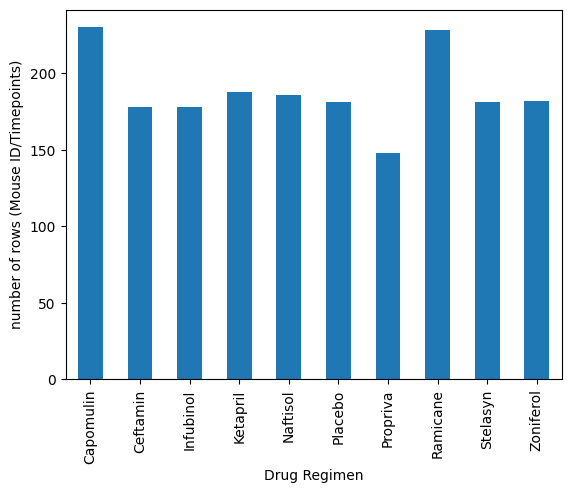

In [344]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_number_of_rows_df=cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()
total_number_of_rows_df.sort_values
Figure_bar=total_number_of_rows_df.plot(kind="bar")
Figure_bar.set_ylabel("number of rows (Mouse ID/Timepoints)")
plt.show()
 



In [192]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


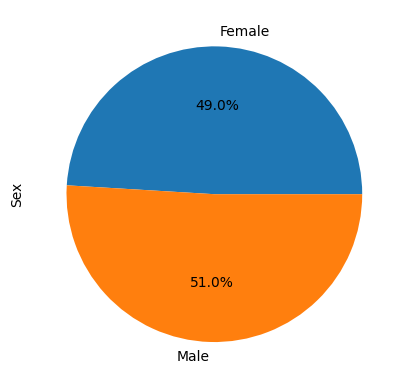

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=cleaned_df.groupby("Sex")["Mouse ID"].count()

Figure_pie=sex_df.plot(kind="pie", y=sex_df,autopct="%1.1f%%")
Figure_pie.set_ylabel("Sex")
plt.show()

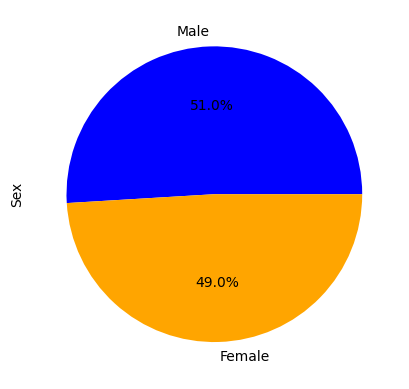

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Male", "Female"]
pie_votes = [958,922]
colors = ["blue","orange"]
plt.pie(pie_votes,labels=pies, colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [326]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_time_list=cleaned_df.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df=pd.merge(study_results,latest_time_list,on=["Mouse ID","Timepoint"])
final_tumor_df=pd.merge(tumor_df,mouse_metadata,on="Mouse ID")
final_tumor_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [338]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume_Capomulin=[]
Tumor_Volume_Ramicane=[]
Tumor_Volume_Infubinol=[]
Tumor_Volume_Ceftamin=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
final_tumor=final_tumor_df["Tumor Volume (mm3)"]
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound,upper_bound)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in final_tumor_df["Drug Regimen"]:
    if x==treatment[0]:
        Tumor_Volume_Capomulin.append(final_tumor_df["Tumor Volume (mm3)"])
    elif x==treatment[1]:
        Tumor_Volume_Ramicane.append(final_tumor_df["Tumor Volume (mm3)"])
    elif x==treatment[2]:
        Tumor_Volume_Infubinol.append(final_tumor_df["Tumor Volume (mm3)"])
    elif x==treatment[3]:
        Tumor_Volume_Ceftamin.append(final_tumor_df["Tumor Volume (mm3)"])
print(Tumor_Volume_Capomulin)
   # add subset 
    
    # Determine outliers using upper and lower bounds


17.10923096124998 93.82025999125003
[0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
243    41.581521
244    31.023923
245    61.433892
246    58.634971
247    72.555239
Name: Tumor Volume (mm3), Length: 248, dtype: float64, 0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
243    41.581521
244    31.023923
245    61.433892
246    58.634971
247    72.555239
Name: Tumor Volume (mm3), Length: 248, dtype: float64, 0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
243    41.581521
244    31.023923
245    61.433892
246    58.634971
247    72.555239
Name: Tumor Volume (mm3), Length: 248, dtype: float64, 0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
243    41.581521
244    31.023923
245    61.433892
246    58.634971
247    72.555239
Name: Tumor Volume (mm3), Length: 248, dtype: floa

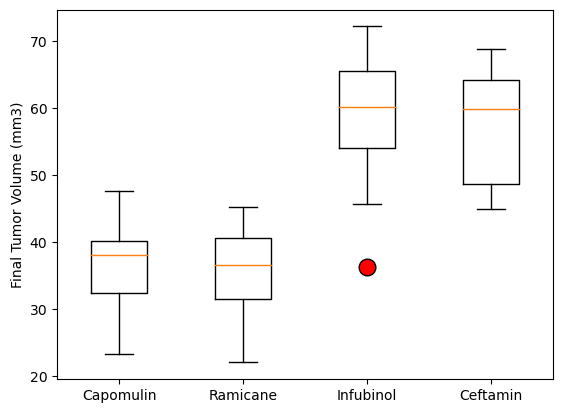

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

The tested Mouse number is l509


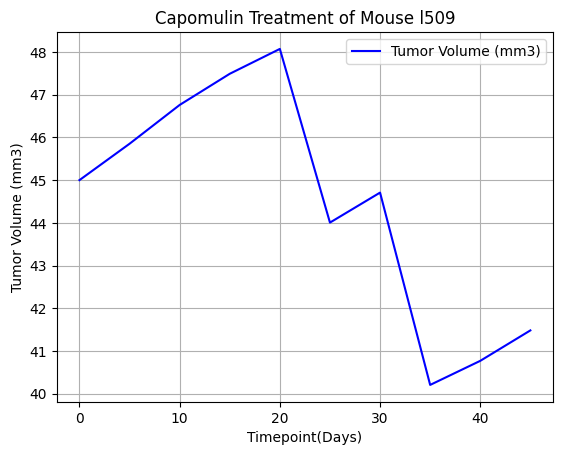

In [286]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:]
singlemouse_number=capomulin_df.iloc[len(capomulin_df)-1,:]["Mouse ID"]
singlemouse_df=capomulin_df.loc[capomulin_df["Mouse ID"]==singlemouse_number]
print("The tested Mouse number is "+ singlemouse_number)


ax=singlemouse_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)",color="blue")
ax.set_title("Capomulin Treatment of Mouse l509")
ax.set_xlabel("Timepoint(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

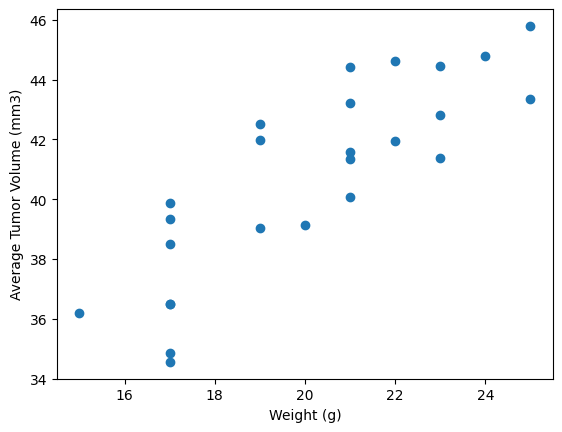

In [287]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(mouse_weight,avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


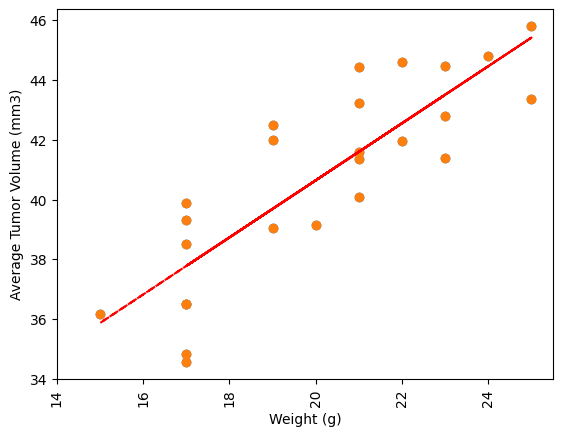

In [310]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(avg_tumor,mouse_weight)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(mouse_weight,avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(mouse_weight, avg_tumor)
d_fit = d_slope * mouse_weight + d_int
plt.scatter(mouse_weight,avg_tumor)
plt.plot(mouse_weight,d_fit,"--",color="red")

x_axis=np.arange(14,25,2)
tick_locations=[value for value in x_axis]
plt.xticks(x_axis, rotation=90)

plt.show()

